### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
%matplotlib notebook

### Load Dataset

In [2]:
dataset_path = './fake_news.json'
news_df = pd.read_json(dataset_path,lines=True)

# Checking whether dataset is properly loaded
print(news_df.head(10))

len(news_df)

print(type(news_df['headline'][0]))

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   
5             0                               my white inheritance   
6             0         5 ways to file your taxes with less stress   
7             1  richard branson's global-warming donation near...   
8             1  shadow government getting too large to meet in...   
9             0                 lots of parents know this scenario   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https:

### Split train, val and test sets

In [24]:
train_df, rem_df = train_test_split(news_df, test_size=0.25,shuffle=True,random_state=12)

val_df, test_df = train_test_split(rem_df, test_size=0.5,shuffle=True,random_state=12)

In [25]:
print('Size of Train Set', len(train_df))
print('Size of Validation Set',len(val_df))
print('Size of Test Set',len(test_df))

Size of Train Set 21464
Size of Validation Set 3577
Size of Test Set 3578


### Preprocessing the Dataset

In [26]:
def preprocess_dataset(df):
    
    processed_headline_list = []
    headline_len_list = []
    
    for index,row in df.iterrows():
        
        #Calculate headline length
        head_len = len(row['headline'])
        
        # Remove all the special characters
        processed_headline = re.sub(r'\W', ' ', str(row['headline']))
        
        # remove all single characters
        processed_headline = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_headline)
        
        # Remove single characters from the start
        processed_headline = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_headline) 
 
        # Substituting multiple spaces with single space
        processed_headline = re.sub(r'\s+', ' ', processed_headline, flags=re.I)
 
        # Converting to Lowercase
        processed_headline = processed_headline.lower()
 
        processed_headline_list.append(processed_headline)
        headline_len_list.append(head_len)
    
    df['processed_headline'] = processed_headline_list
    df['headline_length'] = headline_len_list
    
    return df

In [39]:
train_df = preprocess_dataset(train_df)
val_df = preprocess_dataset(train_df)
test_df = preprocess_dataset(test_df)

train_val_combined_df = pd.concat([train_df, val_df], ignore_index=True)


print(train_df.head(5))
print(val_df.head(5))
print(test_df.head(5))

<ipython-input-26-7911cd3d6acf>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_headline'] = processed_headline_list
<ipython-input-26-7911cd3d6acf>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['headline_length'] = headline_len_list


       is_sarcastic                                           headline  \
18441             1  poll finds americans would be open to third ty...   
2815              1  bernie sanders asks anyone who's serious about...   
25406             0  brazilian 'surfer angel' considered for sainthood   
26462             0                        rest in peace leelah alcorn   
14520             1  ice agent can't believe he being reprimanded f...   

                                            article_link  \
18441  https://www.theonion.com/poll-finds-americans-...   
2815   https://politics.theonion.com/bernie-sanders-a...   
25406  https://www.huffingtonpost.com/entry/surfer-an...   
26462  https://www.huffingtonpost.com/entry/rest-in-p...   
14520  https://www.theonion.com/ice-agent-can-t-belie...   

                                      processed_headline  headline_length  
18441  poll finds americans would be open to third ty...               68  
2815   bernie sanders asks anyone who seri

### Exploratory Data Analysis

#### Raw Headline

In [34]:
#Find the top-20 most frequently used words in real and fake headlines and use a bar plot to show 
# their relative frequencies. #What can you say about these words? What changes when stop words are removed?

train_real_headlines = train_df[train_df['is_sarcastic']==0]
train_fake_headlines = train_df[train_df['is_sarcastic']==1]

from collections import Counter
from nltk.tokenize import word_tokenize

real = train_real_headlines['processed_headline'].tolist()
fake = train_fake_headlines['processed_headline'].tolist()

real_word_list = [word for line in real for word in line.split()]
fake_word_list = [word for line in fake for word in line.split()]

real_word_count = Counter(real_word_list)
fake_word_count = Counter(fake_word_list)

print(real_word_count.most_common(20))
print()
print(fake_word_count.most_common(20))

[('the', 3504), ('to', 3066), ('of', 1864), ('in', 1848), ('for', 1430), ('and', 1243), ('is', 1133), ('trump', 1090), ('on', 998), ('with', 722), ('you', 671), ('this', 523), ('new', 515), ('at', 496), ('from', 493), ('how', 491), ('it', 474), ('about', 473), ('are', 426), ('your', 404)]

[('to', 3755), ('of', 2887), ('in', 1595), ('for', 1323), ('on', 963), ('man', 956), ('new', 776), ('with', 752), ('the', 581), ('by', 567), ('at', 521), ('he', 519), ('from', 496), ('out', 447), ('up', 432), ('after', 430), ('it', 424), ('report', 389), ('about', 367), ('as', 361)]


<IPython.core.display.Javascript object>


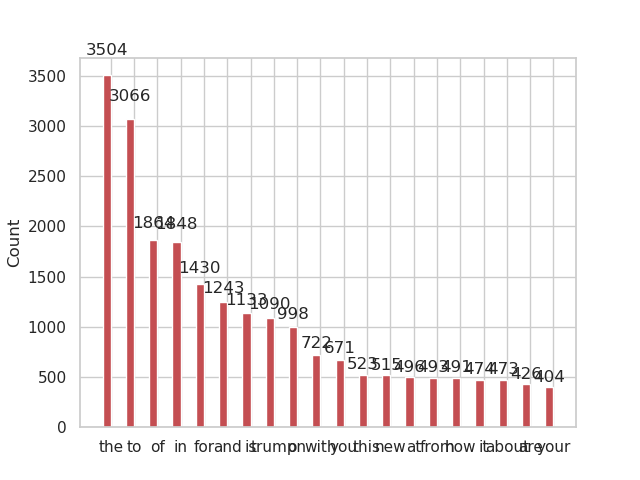

<IPython.core.display.Javascript object>


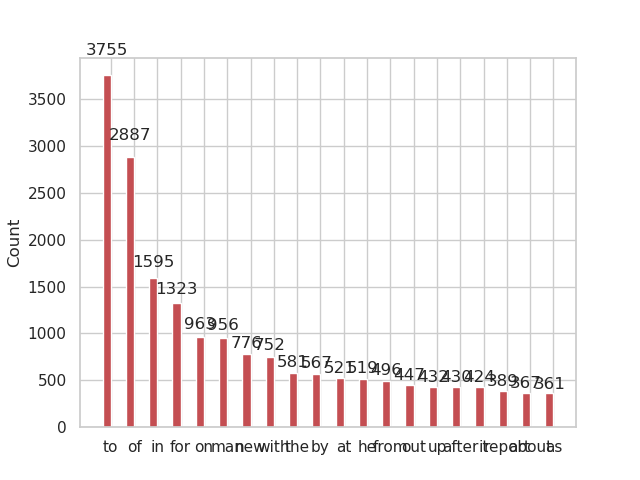

In [35]:
# Plot the most frequent words
def plot_common_words(common_word_list):
    
    names, values = zip(*common_word_list)  

    ind = np.arange(len(common_word_list))
    width = 0.35

    fig, ax = plt.subplots()
    rects = ax.bar(ind, values, width, color='r')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Count')
    ax.set_xticks(ind+width/2.)
    ax.set_xticklabels(names)

    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

        
        
plot_common_words(real_word_count.most_common(20))
plot_common_words(fake_word_count.most_common(20))

#### Headlines Without Stop Words

[('trump', 1090), ('new', 515), ('donald', 355), ('says', 263), ('women', 233), ('one', 198), ('people', 195), ('year', 185), ('world', 184), ('man', 175), ('first', 171), ('obama', 170), ('day', 163), ('black', 161), ('gop', 161), ('5', 161), ('like', 159), ('make', 158), ('life', 151), ('clinton', 151)]

[('man', 956), ('new', 776), ('report', 389), ('area', 360), ('trump', 290), ('nation', 288), ('woman', 278), ('year', 264), ('one', 238), ('time', 232), ('old', 223), ('day', 215), ('like', 186), ('still', 184), ('first', 180), ('study', 176), ('get', 170), ('house', 168), ('finds', 165), ('back', 163)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ayushrai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>


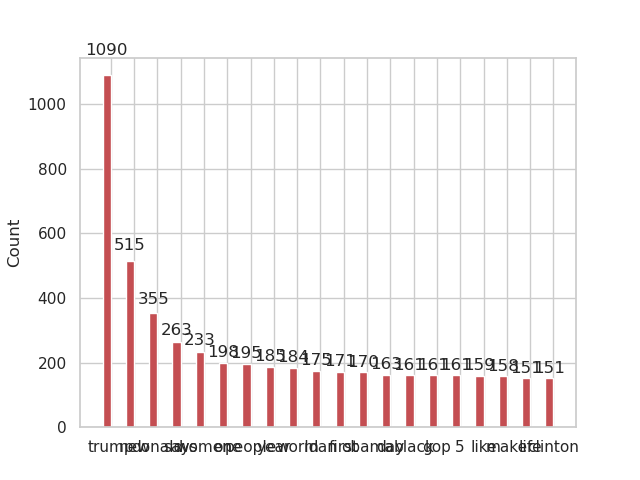

<IPython.core.display.Javascript object>


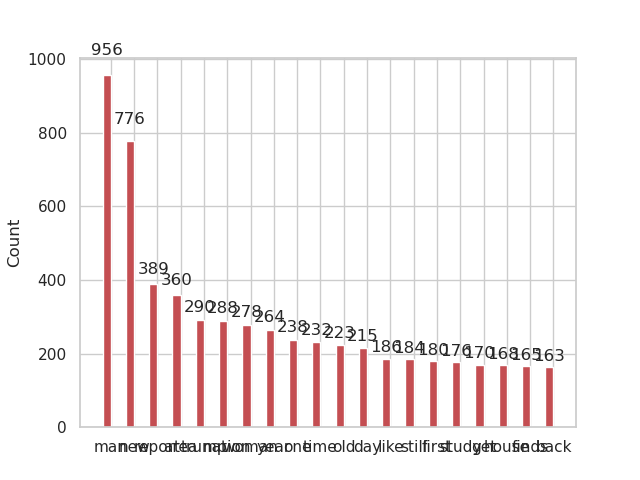

In [36]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords  

stop_words = set(stopwords.words('english'))  

filtered_real_word_list = [w for w in real_word_list if not w in stop_words]
filtered_fake_word_list = [w for w in fake_word_list if not w in stop_words]  

filtered_real_word_count = Counter(filtered_real_word_list)
filtered_fake_word_count = Counter(filtered_fake_word_list)


print(filtered_real_word_count.most_common(20))
print()
print(filtered_fake_word_count.most_common(20))

plot_common_words(filtered_real_word_count.most_common(20))
plot_common_words(filtered_fake_word_count.most_common(20))

### Length Distribution

<IPython.core.display.Javascript object>


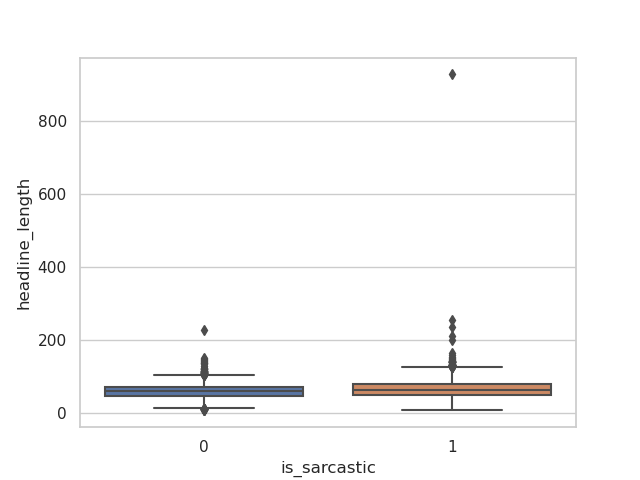

In [37]:
#Compare the distribution of headline lengths in real and fake headlines using appropriate plots (e.g. a boxplot).
# Are fake headlines usually shorter or longer? Document all your findings 
# and any other interesting observations that you can find.

# Plot BoxPlot for Length
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax = sns.boxplot(x="is_sarcastic", y="headline_length", data=train_df)

In [11]:
## Fake News and Stories are shorter than Real News in general.

### Feature Extraction

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer  

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  

train_features = tfidfconverter.fit_transform(train_df['processed_headline']).toarray()
y_train = np.array(train_df['is_sarcastic'].tolist())


val_features = tfidfconverter.transform(val_df['processed_headline']).toarray()
y_val = np.array(val_df['is_sarcastic'].tolist())

test_features = tfidfconverter.transform(test_df['processed_headline']).toarray()
y_test = np.array(val_df['is_sarcastic'].tolist())



### Supervised Classification

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

#------------------------------------------------------------------------------------------------------------------------------

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

#-------------------------------------------------------------------------------------------------------------------------------
def feature_reduction(train_features,y_train,val_features,test_features,train_features_full,feature_list):

    clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
    clf = clf.fit(train_features, y_train)

    features = pd.DataFrame()
    features['feature'] = feature_list
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)

    features.plot(kind='barh', figsize=(25, 25),color='r')
    plt.savefig('feature_importance.png')

    model = SelectFromModel(clf, prefit=True)
    train_features_reduced = model.transform(train_features)
    val_features_reduced = model.transform(val_features)
    test_features_reduced = model.transform(test_features)
    train_features_full_reduced = model.transform(train_features_full)

    return train_features_reduced, val_features_reduced ,test_features_reduced, train_features_full_reduced

#-------------------------------------------------------------------------------------------------------------------------------

def apply_xgboost_gradient_boosting(X_train_preprocessed, X_test_preprocessed, y_train, y_test):

    print('Applying XGBoost Gradient Boosting')

    model = XGBClassifier()
    model.fit(X_train_preprocessed, y_train)

    y_test_pred_values = model.predict(X_test_preprocessed)
    y_test_pred = [int(value) for value in y_test_pred_values]

    # Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Gradient Boosting Model from XgBoost is: ', acc)

    return model, acc

#--------------------------------------------------------------------------------------------------------------------------------

def apply_adaboost_classifier(X_train_preprocessed, X_test_preprocessed, y_train, y_test):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying AdaBoost Classifier')

    # Training the classifier
    classifier = AdaBoostClassifier(n_estimators=100)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed) 

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Adaboost Classifier Model is: ', acc)

    return classifier, acc

#---------------------------------------------------------------------------------------------------------------------------------

def apply_gradient_boosting(X_train_preprocessed, X_test_preprocessed, y_train, y_test):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying Gradient Boosting')

    # Training the classifier
    classifier = GradientBoostingClassifier(n_estimators=100)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Gradient Boosting Classifier Model is: ', acc)

    return classifier, acc

#--------------------------------------------------------------------------------------------------------------------------------

def apply_logistic_regression(X_train_preprocessed, X_test_preprocessed, y_train, y_test):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying Logistic Regression')

    # Training the classifier
    classifier = LogisticRegression()
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Logistic Regression Classifier Model is: ', acc)

    return classifier, acc

#-------------------------------------------------------------------------------------------------------------------------------

def apply_data_preprocessing(train_features):

    # Apply Basic Preprocessing Steps

    print('Applying Data Preprocessing')

    min_max_scaler = preprocessing.MinMaxScaler()
    train_x_minmax = min_max_scaler.fit_transform(train_features)

    return train_x_minmax, min_max_scaler

#------------------------------------------------------------------------------------------------------------------------------------

def apply_hold_one_out_crossval(train_features,val_features,test_features,y_train,y_val):

    print('Apply Hold One Out Cross Validation!')

    #Apply Machine Learning Techinques and Cross Validation
    train_features_preprocessed, min_max_scaler = apply_data_preprocessing(train_features)

    #Val Feature Preprocessing
    val_features_preprocessed = min_max_scaler.transform(val_features)

    #Test Feature Preprocessing
    test_features_preprocessed = min_max_scaler.transform(test_features)

    model1, score1 = apply_xgboost_gradient_boosting(train_features_preprocessed, val_features_preprocessed, y_train, y_val)
    model2, score2 = apply_random_forest(train_features_preprocessed, val_features_preprocessed, y_train, y_val)
    model3, score3 = apply_multi_class_svc(train_features_preprocessed, val_features_preprocessed, y_train, y_val)
    model4, score4 = apply_gradient_boosting(train_features_preprocessed, val_features_preprocessed, y_train, y_val)
    model5, score5 = apply_logistic_regression(train_features_preprocessed, val_features_preprocessed, y_train, y_val)
    model6, score6 = apply_adaboost_classifier(train_features_preprocessed, val_features_preprocessed, y_train, y_val)

    all_model = [model1,model2,model3,model4,model5,model6]
    all_score = [score1,score2,score3,score4,score5,score6]

    max_score = max(all_score)

    model = all_model[all_score.index(max_score)]

    return model, test_features_preprocessed

#--------------------------------------------------------------------------------------------------------------------------------------

def apply_random_forest(X_train_preprocessed, X_test_preprocessed, y_train, y_test):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying Random Forest')

    # Training the classifier
    classifier = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
    classifier = classifier.fit(X_train_preprocessed,y_train)

    # Testing the classifier on Test Data
    y_test_pred = classifier.predict(X_test_preprocessed) 

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by the Random Forest Classifier Model is: ', acc)

    return classifier, acc

#---------------------------------------------------------------------------------------------------------------------------------------

def apply_multi_class_svc(X_train_preprocessed, X_test_preprocessed, y_train, y_test):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying Multi-Class SVC')

    clf = SVC(gamma='auto')
    clf = clf.fit(X_train_preprocessed,y_train)

    # Testing the Classifier on Test Data
    y_test_pred = clf.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by Support Vector Classifier is: ', acc)

    return clf, acc


#---------------------------------------------------------------------------------------------------------------

def apply_lightgm(X_train_preprocessed, X_test_preprocessed, y_train, y_test):

    ##TO DO : Testing Hyper Parameters and Cross Validation

    print('Applying Multi-Class SVC')

    clf = SVC(gamma='auto')
    clf = clf.fit(X_train_preprocessed,y_train)

    # Testing the Classifier on Test Data
    y_test_pred = clf.predict(X_test_preprocessed)

    #Compute Accuracy Score
    acc = accuracy_score(y_test,y_test_pred,normalize=True)

    print('The accuracy achieved by Support Vector Classifier is: ', acc)

    return clf, acc


#---------------------------------------------------------------------------------------------------------------------------------------

def complete_training(train_features_full_reduced, train_targets):

    #Retrain the model using full training dataset

    print('Training on the complete Dataset')
    model = XGBClassifier()
    model.fit(train_features_full_reduced, train_targets)

    return model

#------------------------------------------------------------------------------------------------------------------------------------------

def test_evaluation(model,test_features_reduced,y_test):

    y_test_pred_values = model.predict(test_features_reduced)
    y_test_pred = [int(value) for value in y_test_pred_values]

    # Computing Results for Submission
    #df_output = pd.DataFrame()
    #aux = pd.read_csv(test_file_path)
    #df_output['PassengerId'] = aux['PassengerId']
    #df_output['Survived'] = y_test_pred
    #df_output[['PassengerId','Survived']].to_csv(pred_file_name, index=False)

#----------------------------------------------------------------------------------------------------------------------------------------------

def apply_stratified_kfold_crossval_xgboost(train_full_features,test_features,y_train,nsplit):
    
    #Apply Machine Learning Techinques and Cross Validation
    train_features_preprocessed, min_max_scaler = apply_data_preprocessing(train_features)
    
    test_features_preprocessed = min_max_scaler.transform(test_features)

    print('Apply Stratified Cross Validation and Grid Search')

    parameter_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

    xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

    cross_validation = StratifiedKFold(n_splits=nsplit)

    grid_search = GridSearchCV(xgb,
                              scoring='accuracy',
                              param_grid=parameter_grid,
                              cv=cross_validation,
                              verbose=1
                             )

    grid_search.fit(train_features_full_reduced, train_targets)
    tuned_model = grid_search
    #parameters = grid_search.best_params_
    #print('Best score: {}'.format(grid_search.best_score_))
    #print('Best parameters: {}'.format(grid_search.best_params_))

    return tuned_model, test_features_preprocessed

#--------------------------------------------------------------------------------------------------------------------



In [44]:
import numpy as np 
import pandas as pd 
#from apply_ml import *
#from feature_engineering import *
from sklearn.model_selection import KFold

#--------------------------------------------------------------------------------------------------------------------------------------------------


#cross_val_type = 'Hold_Out'
#cross_val_type = 'Stratified_KFold'

#feature_list = list(train_features.columns)

# Apply Hold One Out Cross validation
model_crossval,test_features_preprocessed = apply_hold_one_out_crossval(train_features,val_features,test_features,train_y,val_y)
test_evaluation(model_crossval, test_features_reduced, y_test)

Apply Hold One Out Cross Validation!
Applying Data Preprocessing
Applying XGBoost Gradient Boosting
The accuracy achieved by the Gradient Boosting Model from XgBoost is:  0.7714778233320909
Applying Random Forest
The accuracy achieved by the Random Forest Classifier Model is:  0.6175922474841595
Applying Multi-Class SVC


KeyboardInterrupt: 

In [ ]:
train_full_features = tfidfconverter.fit_transform(train_df['processed_headline']).toarray()
y_train = np.array(train_df['is_sarcastic'].tolist())

test_features = tfidfconverter.transform(test_df['processed_headline']).toarray()
y_test = np.array(val_df['is_sarcastic'].tolist())


nsplit = 5

#Apply Stratified KFold Cross Validation and Hyperparameter Grid search for XgGoost Model and train the model on complete training set
tuned_final_model, test_features_preprocessed = apply_stratified_kfold_crossval_xgboost(train_full_features,test_features,y_train,nsplit)
test_evaluation(tuned_final_model, test_features_reduced, y_test)

### Model Selection

In [ ]:
# On validatiom set only apply idf transform method

### Model Evaluation

In [ ]:
# AUC Curve
# Confusion Matrix
# 

In [17]:
from xgboost import XGBClassifier